# Derivados Financieros 2021 - Clase 2


## 1) Modulo yfinance para Yahoo Finance
## 2) Plots
## 3) Payoffs - Estraegias


In [1]:
### Importo los modulos

from data_nyse import *

import yfinance as yf
import datetime

## API Yahoo finance


Modulos necesarios

data_nyse (en webcampus) ;

pandas,

matplotlib,

datetime,

yfinance, (yfinance-0.1.63 - tuve que actualizar reicentemente)

sys,

Instalarlos con Anaconda, comando Conda o comando pip install


urllib.requestatexit
datetime
dateutil

import tda
json
selenium, webdriver


## Queremos emular lo que hicimos para BYMA

In [2]:
### Metodo para el web scraping
panel_yahoo_GGAL = obtener_opciones_yahoo_finance('GGAL')
panel_yahoo_GGAL


,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency,Ticker,Spot
0,GGAL210716C00005000,2021-07-08 16:19:57,5.0,3.20,0.0,0.0,0.0,0.0,110.0,271,0.000010,True,REGULAR,USD,GGAL,8.5
1,GGAL210716C00007500,2021-07-13 15:13:27,7.5,0.90,0.0,0.0,0.0,0.0,101.0,151,0.000010,True,REGULAR,USD,GGAL,8.5
2,GGAL210716C00010000,2021-07-06 14:02:47,10.0,0.05,0.0,0.0,0.0,0.0,1.0,3479,0.500005,False,REGULAR,USD,GGAL,8.5
3,GGAL210716C00012500,2021-07-07 16:57:42,12.5,0.03,0.0,0.0,0.0,0.0,1.0,1890,0.500005,False,REGULAR,USD,GGAL,8.5
4,GGAL210716C00015000,2021-03-10 15:33:02,15.0,0.10,0.0,0.0,0.0,0.0,2.0,245,0.500005,False,REGULAR,USD,GGAL,8.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,GGAL230120P00010000,2021-07-13 14:42:44,10.0,3.30,0.0,0.0,0.0,0.0,3.0,475,0.000010,True,REGULAR,USD,GGAL,8.5
4,GGAL230120P00012500,2021-07-12 19:53:24,12.5,5.00,0.0,0.0,0.0,0.0,2.0,27,0.000010,True,REGULAR,USD,GGAL,8.5
5,GGAL230120P00015000,2021-06-22 17:42:41,15.0,6.51,0.0,0.0,0.0,0.0,1.0,2,0.000010,True,REGULAR,USD,GGAL,8.5
6,GGAL230120P00017500,2021-07-12 19:53:24,17.5,11.75,0.0,0.0,0.0,0.0,3.0,29,0.000010,True,REGULAR,USD,GGAL,8.5


In [3]:

panel_ociones_GGAL_nyse_clean = obtener_panel_opciones_nyse('GGAL', True)
panel_ociones_GGAL_nyse_clean

,Especie,Ticker,Spot,CallPut,Strike,TTM,Last,Moneyness,impliedVolatility,Ask,Bid
0,GGAL210716C00005000,GGAL,8.5,C,5.0,2,3.20,1.700000,0.000010,0.00,0.0
1,GGAL210716P00005000,GGAL,8.5,P,5.0,2,0.05,1.700000,5.796878,0.55,0.0
2,GGAL210716C00007500,GGAL,8.5,C,7.5,2,0.90,1.133333,0.000010,0.00,0.0
3,GGAL210716P00007500,GGAL,8.5,P,7.5,2,0.05,1.133333,0.500005,0.00,0.0
4,GGAL210716C00010000,GGAL,8.5,C,10.0,2,0.05,0.850000,0.500005,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...
56,GGAL230120P00015000,GGAL,8.5,P,15.0,555,6.51,0.566667,0.000010,0.00,0.0
57,GGAL230120C00017500,GGAL,8.5,C,17.5,555,0.45,0.485714,0.125009,0.00,0.0
58,GGAL230120P00017500,GGAL,8.5,P,17.5,555,11.75,0.485714,0.000010,0.00,0.0
59,GGAL230120C00020000,GGAL,8.5,C,20.0,555,0.34,0.425000,0.125009,0.00,0.0


## 1) Modulo yfinance para Yahoo Finance

In [4]:
ticker = 'GGAL'
data = yf.Ticker(ticker)

#Data es un objeto
# data.info contiene informacion (mucha) del activo

data.info



{'zip': '1038',
 'sector': 'Financial Services',
 'fullTimeEmployees': 9271,
 'longBusinessSummary': "Grupo Financiero Galicia S.A., a financial services holding company, provides various financial products and services to individuals and companies in Argentina. The company operates through Banks, Ecosistema NaranjaX, Insurance, and Other Businesses segments. The company's products and services cover savings, current, and checking accounts; personal loans; express and mortgage loans; credit and debit cards; and online banking services. It also offers financing products and services; consumer finance services; electronic check products and services; global custody services; Fima funds; financial and stock market services to individuals, companies, and financial institutions; foreign trade services; and capital market and investment banking products that include debt securities, short-term securities, letters, and financial trusts. In addition, the company provides home and life, and pet

In [5]:
# Spot price

hist = data.history()

spot = hist.tail(1)['Close'].iloc[0]
spot

8.5

In [6]:
# Vencimientos de opciones
vencimientos = data.options

vencimientos

('2021-07-16', '2021-08-20', '2021-10-15', '2022-01-21', '2023-01-20')

In [7]:
# Calls y puts
calls = data.option_chain(vencimientos[0])[0]
puts = data.option_chain(vencimientos[0])[1]

puts

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,GGAL210716P00005000,2021-05-18 15:21:36,5.0,0.05,0.0,0.55,0.0,0.0,6,69,5.796878,False,REGULAR,USD
1,GGAL210716P00007500,2021-07-07 19:19:44,7.5,0.05,0.0,0.00,0.0,0.0,5,1435,0.500005,False,REGULAR,USD
2,GGAL210716P00010000,2021-07-12 19:27:29,10.0,1.50,0.0,0.00,0.0,0.0,12,166,0.000010,True,REGULAR,USD
3,GGAL210716P00012500,2021-05-12 19:20:41,12.5,4.94,2.6,2.90,0.0,0.0,2,13,0.000010,True,REGULAR,USD
4,GGAL210716P00015000,2021-01-19 05:11:03,15.0,7.32,6.7,7.00,0.0,0.0,17,17,5.500003,True,REGULAR,USD


### Que hace internamente el metodo??

In [8]:
#Recorro cada vencimiento disponible y voy tomando calls por un lado y puts por otro
for vencimiento in vencimientos[1:]:
        calls = calls.append(data.option_chain(vencimiento)[0])
        puts = puts.append(data.option_chain(vencimiento)[1])

#Uno los puts y los calls
panel_opciones = calls.append(puts)

# Le agrego dos columnas utiles - Ticker y Spot

panel_opciones['Spot'] = hist.tail(1)['Close'].iloc[0]
panel_opciones['Ticker'] = ticker

panel_opciones.head(10)

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency,Spot,Ticker
0,GGAL210716C00005000,2021-07-08 16:19:57,5.0,3.20,0.0,0.0,0.0,0.0,110.0,271,0.000010,True,REGULAR,USD,8.5,GGAL
1,GGAL210716C00007500,2021-07-13 15:13:27,7.5,0.90,0.0,0.0,0.0,0.0,101.0,151,0.000010,True,REGULAR,USD,8.5,GGAL
2,GGAL210716C00010000,2021-07-06 14:02:47,10.0,0.05,0.0,0.0,0.0,0.0,1.0,3479,0.500005,False,REGULAR,USD,8.5,GGAL
3,GGAL210716C00012500,2021-07-07 16:57:42,12.5,0.03,0.0,0.0,0.0,0.0,1.0,1890,0.500005,False,REGULAR,USD,8.5,GGAL
4,GGAL210716C00015000,2021-03-10 15:33:02,15.0,0.10,0.0,0.0,0.0,0.0,2.0,245,0.500005,False,REGULAR,USD,8.5,GGAL
0,GGAL210820C00005000,2021-06-25 15:09:02,5.0,4.30,0.0,0.0,0.0,0.0,1.0,1,0.000010,True,REGULAR,USD,8.5,GGAL
1,GGAL210820C00007500,2021-07-13 19:38:25,7.5,1.25,0.0,0.0,0.0,0.0,10.0,97,0.000010,True,REGULAR,USD,8.5,GGAL
2,GGAL210820C00010000,2021-07-13 19:26:30,10.0,0.10,0.0,0.0,0.0,0.0,8.0,36,0.125009,False,REGULAR,USD,8.5,GGAL
3,GGAL210820C00012500,2021-06-23 17:18:27,12.5,0.10,0.0,0.0,0.0,0.0,NaN,1,0.250007,False,REGULAR,USD,8.5,GGAL
0,GGAL211015C00005000,2021-06-08 14:49:02,5.0,5.10,3.1,3.3,0.0,0.0,1.0,1,0.000010,True,REGULAR,USD,8.5,GGAL


## Del panel de Yahoo crudo a otro con informacion customizada (igual que antes)

#### *) Agrego columnas utiles

In [9]:

panel_opciones['Moneyness'] = 0.0
panel_opciones['TTM'] = 0
panel_opciones['CallPut'] = ''
panel_opciones = panel_opciones.reset_index()

panel_opciones.head(5)

,index,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency,Spot,Ticker,Moneyness,TTM,CallPut
0,0,GGAL210716C00005000,2021-07-08 16:19:57,5.0,3.20,0.0,0.0,0.0,0.0,110.0,271,0.000010,True,REGULAR,USD,8.5,GGAL,0.0,0,
1,1,GGAL210716C00007500,2021-07-13 15:13:27,7.5,0.90,0.0,0.0,0.0,0.0,101.0,151,0.000010,True,REGULAR,USD,8.5,GGAL,0.0,0,
2,2,GGAL210716C00010000,2021-07-06 14:02:47,10.0,0.05,0.0,0.0,0.0,0.0,1.0,3479,0.500005,False,REGULAR,USD,8.5,GGAL,0.0,0,
3,3,GGAL210716C00012500,2021-07-07 16:57:42,12.5,0.03,0.0,0.0,0.0,0.0,1.0,1890,0.500005,False,REGULAR,USD,8.5,GGAL,0.0,0,
4,4,GGAL210716C00015000,2021-03-10 15:33:02,15.0,0.10,0.0,0.0,0.0,0.0,2.0,245,0.500005,False,REGULAR,USD,8.5,GGAL,0.0,0,


#### *) Recorro las filas (1ra como ejemplo)

In [10]:
idx = panel_opciones.index.values[0]

In [11]:
callput = panel_opciones.contractSymbol.values[idx][10:11]
panel_opciones['CallPut'].values[idx] = callput

In [12]:
year = 2000 + int(panel_opciones.contractSymbol.values[idx][4:6])
month = int(panel_opciones.contractSymbol.values[idx][6:8])
day = int(panel_opciones.contractSymbol.values[idx][8:10])

hoy = datetime.date.today()
expiry_datetime = datetime.date(year, month, day)
ttm = (expiry_datetime - hoy).days

panel_opciones['TTM'].values[idx] = ttm

In [13]:
panel_opciones['Moneyness'].values[idx] = panel_opciones['Spot'].values[idx] / panel_opciones['strike'].values[idx]

In [14]:
panel_opciones.head(2)

,index,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency,Spot,Ticker,Moneyness,TTM,CallPut
0,0,GGAL210716C00005000,2021-07-08 16:19:57,5.0,3.2,0.0,0.0,0.0,0.0,110.0,271,0.00001,True,REGULAR,USD,8.5,GGAL,1.7,2,C
1,1,GGAL210716C00007500,2021-07-13 15:13:27,7.5,0.9,0.0,0.0,0.0,0.0,101.0,151,0.00001,True,REGULAR,USD,8.5,GGAL,0.0,0,


#### *) Recorro las filas (las restantes como ejemplo)

In [15]:
for idx in list(panel_opciones.index.values[1:]):
        year = 2000 + int(panel_opciones.contractSymbol.values[idx][4:6])
        month = int(panel_opciones.contractSymbol.values[idx][6:8])
        day = int(panel_opciones.contractSymbol.values[idx][8:10])
        
        hoy = datetime.date.today()
        expiry_datetime = datetime.date(year, month, day)
        ttm = (expiry_datetime - hoy).days

        panel_opciones['TTM'].values[idx] = ttm
        callput = panel_opciones.contractSymbol.values[idx][10:11]
        panel_opciones['CallPut'].values[idx] = callput
        
panel_opciones.Moneyness = panel_opciones.Spot/ panel_opciones.strike


In [16]:
panel_opciones.head(10)

,index,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency,Spot,Ticker,Moneyness,TTM,CallPut
0,0,GGAL210716C00005000,2021-07-08 16:19:57,5.0,3.20,0.0,0.0,0.0,0.0,110.0,271,0.000010,True,REGULAR,USD,8.5,GGAL,1.700000,2,C
1,1,GGAL210716C00007500,2021-07-13 15:13:27,7.5,0.90,0.0,0.0,0.0,0.0,101.0,151,0.000010,True,REGULAR,USD,8.5,GGAL,1.133333,2,C
2,2,GGAL210716C00010000,2021-07-06 14:02:47,10.0,0.05,0.0,0.0,0.0,0.0,1.0,3479,0.500005,False,REGULAR,USD,8.5,GGAL,0.850000,2,C
3,3,GGAL210716C00012500,2021-07-07 16:57:42,12.5,0.03,0.0,0.0,0.0,0.0,1.0,1890,0.500005,False,REGULAR,USD,8.5,GGAL,0.680000,2,C
4,4,GGAL210716C00015000,2021-03-10 15:33:02,15.0,0.10,0.0,0.0,0.0,0.0,2.0,245,0.500005,False,REGULAR,USD,8.5,GGAL,0.566667,2,C
5,0,GGAL210820C00005000,2021-06-25 15:09:02,5.0,4.30,0.0,0.0,0.0,0.0,1.0,1,0.000010,True,REGULAR,USD,8.5,GGAL,1.700000,37,C
6,1,GGAL210820C00007500,2021-07-13 19:38:25,7.5,1.25,0.0,0.0,0.0,0.0,10.0,97,0.000010,True,REGULAR,USD,8.5,GGAL,1.133333,37,C
7,2,GGAL210820C00010000,2021-07-13 19:26:30,10.0,0.10,0.0,0.0,0.0,0.0,8.0,36,0.125009,False,REGULAR,USD,8.5,GGAL,0.850000,37,C
8,3,GGAL210820C00012500,2021-06-23 17:18:27,12.5,0.10,0.0,0.0,0.0,0.0,NaN,1,0.250007,False,REGULAR,USD,8.5,GGAL,0.680000,37,C
9,0,GGAL211015C00005000,2021-06-08 14:49:02,5.0,5.10,3.1,3.3,0.0,0.0,1.0,1,0.000010,True,REGULAR,USD,8.5,GGAL,1.700000,93,C


#### Panel Limpio

In [17]:
panel_opciones = panel_opciones.rename(
            columns={'lastTradeDate': 'Last_Date', 'contractSymbol': 'Especie', 'strike': 'Strike', 'bid': 'Bid',
                     'ask': 'Ask', 'lastPrice': 'Last'}, inplace=False)

panel_opciones = panel_opciones.sort_values(['TTM', 'Ticker', 'Strike', 'CallPut'])

panel_opciones = panel_opciones[['Especie', 'Ticker', 'Spot', 'CallPut', 'Strike', 'TTM', 'Last', 'Bid','Ask','impliedVolatility','Moneyness']]


In [18]:
panel_opciones = panel_opciones.reset_index()
del panel_opciones['index']
panel_opciones

,Especie,Ticker,Spot,CallPut,Strike,TTM,Last,Bid,Ask,impliedVolatility,Moneyness
0,GGAL210716C00005000,GGAL,8.5,C,5.0,2,3.20,0.0,0.00,0.000010,1.700000
1,GGAL210716P00005000,GGAL,8.5,P,5.0,2,0.05,0.0,0.55,5.796878,1.700000
2,GGAL210716C00007500,GGAL,8.5,C,7.5,2,0.90,0.0,0.00,0.000010,1.133333
3,GGAL210716P00007500,GGAL,8.5,P,7.5,2,0.05,0.0,0.00,0.500005,1.133333
4,GGAL210716C00010000,GGAL,8.5,C,10.0,2,0.05,0.0,0.00,0.500005,0.850000
...,...,...,...,...,...,...,...,...,...,...,...
56,GGAL230120P00015000,GGAL,8.5,P,15.0,555,6.51,0.0,0.00,0.000010,0.566667
57,GGAL230120C00017500,GGAL,8.5,C,17.5,555,0.45,0.0,0.00,0.125009,0.485714
58,GGAL230120P00017500,GGAL,8.5,P,17.5,555,11.75,0.0,0.00,0.000010,0.485714
59,GGAL230120C00020000,GGAL,8.5,C,20.0,555,0.34,0.0,0.00,0.125009,0.425000


## 2) Ploteando los datos

### Para cada vencimiento, grafico los strikes

In [19]:
# NYSE
panel_opciones_ggal_nyse_limpio = obtener_panel_opciones_nyse('GGAL', True)

TTMs = list(set(panel_opciones_ggal_nyse_limpio.TTM.values))
TTMs

[2, 37, 555, 93, 191]

In [20]:
TTM = 8
panel_opciones_ggal_nyse_limpio[(panel_opciones_ggal_nyse_limpio.TTM == TTM) & (panel_opciones_ggal_nyse_limpio.CallPut == "C")].head(10)

,Especie,Ticker,Spot,CallPut,Strike,TTM,Last,Moneyness,impliedVolatility,Ask,Bid


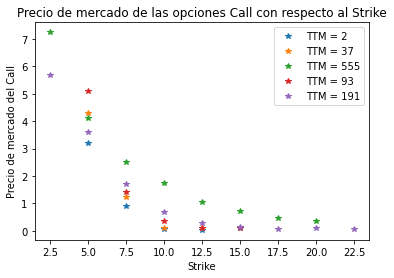

In [21]:
from matplotlib import pyplot as plt
CP = "C"
for TTM in TTMs:
    Ks = panel_opciones_ggal_nyse_limpio[(panel_opciones_ggal_nyse_limpio.TTM == TTM) & (panel_opciones_ggal_nyse_limpio.CallPut == CP)].Strike.values
    precios = panel_opciones_ggal_nyse_limpio[(panel_opciones_ggal_nyse_limpio.TTM == TTM) & (panel_opciones_ggal_nyse_limpio.CallPut == CP)].Last.values
    ## Last VS (B+A)/2
    plt.plot(Ks, precios,'*', label='TTM = '+str(TTM))


plt.legend()

plt.xlabel('Strike')
plt.ylabel('Precio de mercado del Call')
plt.title('Precio de mercado de las opciones Call con respecto al Strike')
    
plt.show()
    

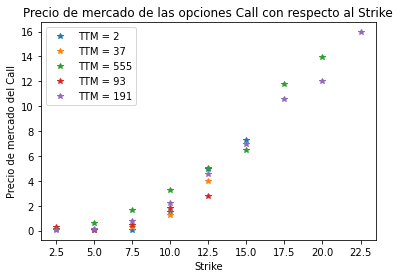

In [22]:

CP = "P"
for TTM in TTMs:
    Ks = panel_opciones_ggal_nyse_limpio[(panel_opciones_ggal_nyse_limpio.TTM == TTM) & (panel_opciones_ggal_nyse_limpio.CallPut == CP)].Strike.values
    precios = panel_opciones_ggal_nyse_limpio[(panel_opciones_ggal_nyse_limpio.TTM == TTM) & (panel_opciones_ggal_nyse_limpio.CallPut == CP)].Last.values
    plt.plot(Ks, precios,'*', label='TTM = '+str(TTM))


plt.legend()

plt.xlabel('Strike')
plt.ylabel('Precio de mercado del Call')
plt.title('Precio de mercado de las opciones Call con respecto al Strike')
    
plt.show()

### Para cada strike, grafico los TTM

In [23]:
Ks = list(set(panel_opciones_ggal_nyse_limpio.Strike.values))

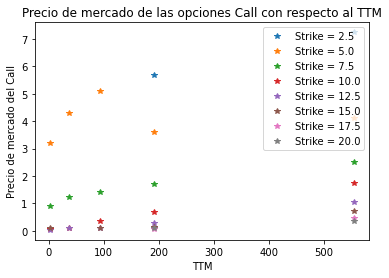

In [24]:
from matplotlib import pyplot as plt
CP = "C"
for K in Ks:
    TTMs = panel_opciones_ggal_nyse_limpio[(panel_opciones_ggal_nyse_limpio.Strike == K) & (panel_opciones_ggal_nyse_limpio.CallPut == CP)].TTM.values
    precios = panel_opciones_ggal_nyse_limpio[(panel_opciones_ggal_nyse_limpio.Strike == K) & (panel_opciones_ggal_nyse_limpio.CallPut == CP)].Last.values
    if len(TTMs)>1:
        plt.plot(TTMs, precios,'*', label='Strike = '+str(K))

plt.legend()

plt.xlabel('TTM')
plt.ylabel('Precio de mercado del Call')
plt.title('Precio de mercado de las opciones Call con respecto al TTM')
    
plt.show()
    

## Ploteando los datos con un ticker mega liquido

In [25]:
# NYSE AAPL
ticker = 'TSLA'
panel_opciones_nyse_limpio = obtener_panel_opciones_nyse(ticker, True)

TTMs = list(set(panel_opciones_nyse_limpio.TTM.values))
TTMs.sort()
TTMs

[2, 9, 16, 23, 30, 37, 44, 65, 93, 128, 156, 191, 247, 338, 429, 555, 611, 702]

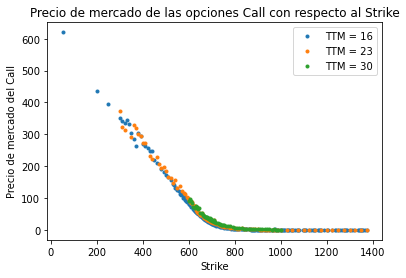

In [26]:

from matplotlib import pyplot as plt
CP = "C"
for TTM in TTMs[2:5]:
    Ks = panel_opciones_nyse_limpio[(panel_opciones_nyse_limpio.TTM == TTM) & (panel_opciones_nyse_limpio.CallPut == CP)].Strike.values
    precios = panel_opciones_nyse_limpio[(panel_opciones_nyse_limpio.TTM == TTM) & (panel_opciones_nyse_limpio.CallPut == CP)].Last.values
    plt.plot(Ks, precios, '.',label='TTM = '+str(TTM))


plt.legend()

plt.xlabel('Strike')
plt.ylabel('Precio de mercado del Call')
plt.title('Precio de mercado de las opciones Call con respecto al Strike')
    
plt.show()
    

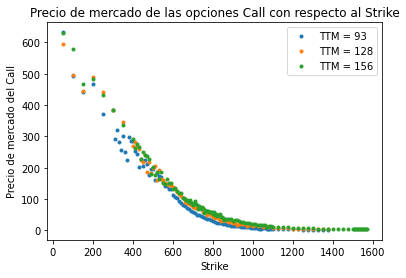

In [27]:

from matplotlib import pyplot as plt
CP = "C"
for TTM in TTMs[8:11]:
    Ks = panel_opciones_nyse_limpio[(panel_opciones_nyse_limpio.TTM == TTM) & (panel_opciones_nyse_limpio.CallPut == CP)].Strike.values
    precios = panel_opciones_nyse_limpio[(panel_opciones_nyse_limpio.TTM == TTM) & (panel_opciones_nyse_limpio.CallPut == CP)].Last.values
    plt.plot(Ks, precios, '.',label='TTM = '+str(TTM))


plt.legend()

plt.xlabel('Strike')
plt.ylabel('Precio de mercado del Call')
plt.title('Precio de mercado de las opciones Call con respecto al Strike')
    
plt.show()
    

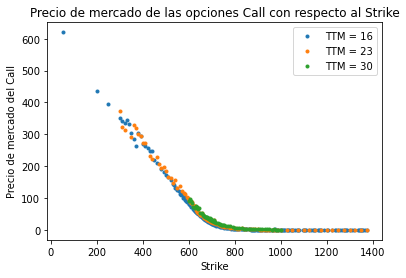

In [28]:

from matplotlib import pyplot as plt
CP = "C"
for TTM in TTMs[2:5]:
    Ks = panel_opciones_nyse_limpio[(panel_opciones_nyse_limpio.TTM == TTM) & (panel_opciones_nyse_limpio.CallPut == CP)].Strike.values
    precios = panel_opciones_nyse_limpio[(panel_opciones_nyse_limpio.TTM == TTM) & (panel_opciones_nyse_limpio.CallPut == CP)].Last.values
    plt.plot(Ks, precios,'.',label='TTM = '+str(TTM))


plt.legend()

plt.xlabel('Strike')
plt.ylabel('Precio de mercado del Call')
plt.title('Precio de mercado de las opciones Call con respecto al Strike')
    
plt.show()
    

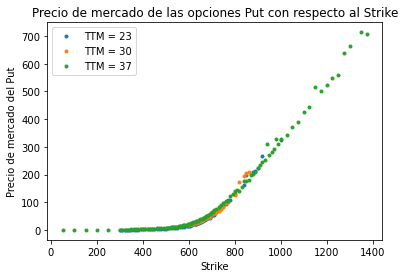

In [29]:
from matplotlib import pyplot as plt
CP = "P"
for TTM in TTMs[3:6]:
    Ks = panel_opciones_nyse_limpio[(panel_opciones_nyse_limpio.TTM == TTM) & (panel_opciones_nyse_limpio.CallPut == CP)].Strike.values
    precios = panel_opciones_nyse_limpio[(panel_opciones_nyse_limpio.TTM == TTM) & (panel_opciones_nyse_limpio.CallPut == CP)].Last.values
    plt.plot(Ks, precios, '.',label='TTM = '+str(TTM))


plt.legend()

plt.xlabel('Strike')
plt.ylabel('Precio de mercado del Put')
plt.title('Precio de mercado de las opciones Put con respecto al Strike')
    
plt.show()
    

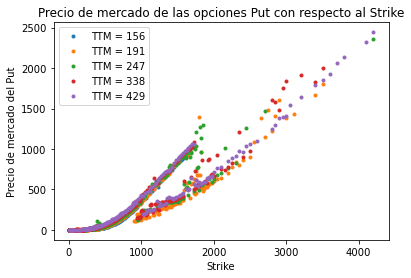

In [30]:
from matplotlib import pyplot as plt
CP = "P"
for TTM in TTMs[10:15]:
    Ks = panel_opciones_nyse_limpio[(panel_opciones_nyse_limpio.TTM == TTM) & (panel_opciones_nyse_limpio.CallPut == CP)].Strike.values
    precios = panel_opciones_nyse_limpio[(panel_opciones_nyse_limpio.TTM == TTM) & (panel_opciones_nyse_limpio.CallPut == CP)].Last.values
    plt.plot(Ks, precios, '.',label='TTM = '+str(TTM))


plt.legend()

plt.xlabel('Strike')
plt.ylabel('Precio de mercado del Put')
plt.title('Precio de mercado de las opciones Put con respecto al Strike')
    
plt.show()
    

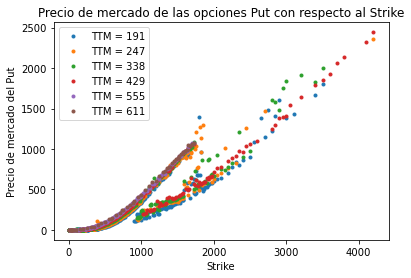

In [31]:
from matplotlib import pyplot as plt
CP = "P"
for TTM in TTMs[11:17]:
    Ks = panel_opciones_nyse_limpio[(panel_opciones_nyse_limpio.TTM == TTM) & (panel_opciones_nyse_limpio.CallPut == CP)].Strike.values
    precios = panel_opciones_nyse_limpio[(panel_opciones_nyse_limpio.TTM == TTM) & (panel_opciones_nyse_limpio.CallPut == CP)].Last.values
    plt.plot(Ks, precios, '.',label='TTM = '+str(TTM))


plt.legend()

plt.xlabel('Strike')
plt.ylabel('Precio de mercado del Put')
plt.title('Precio de mercado de las opciones Put con respecto al Strike')
    
plt.show()
    

In [32]:
Ks = list(set(panel_opciones_nyse_limpio.Strike.values))
Ks.sort()
len(Ks)

660

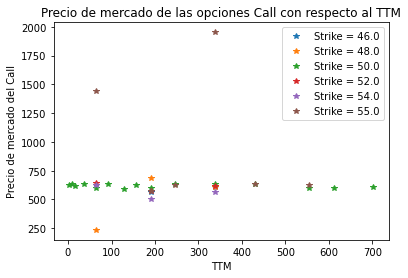

In [33]:
from matplotlib import pyplot as plt
CP = "C"
for K in Ks[45:55]:
    TTMs = panel_opciones_nyse_limpio[(panel_opciones_nyse_limpio.Strike == K) & (panel_opciones_nyse_limpio.CallPut == CP)].TTM.values
    precios = panel_opciones_nyse_limpio[(panel_opciones_nyse_limpio.Strike == K) & (panel_opciones_nyse_limpio.CallPut == CP)].Last.values
    if len(TTMs)>1:
        plt.plot(TTMs, precios,'*', label='Strike = '+str(K))

plt.legend()

plt.xlabel('TTM')
plt.ylabel('Precio de mercado del Call')
plt.title('Precio de mercado de las opciones Call con respecto al TTM')
    
plt.show()

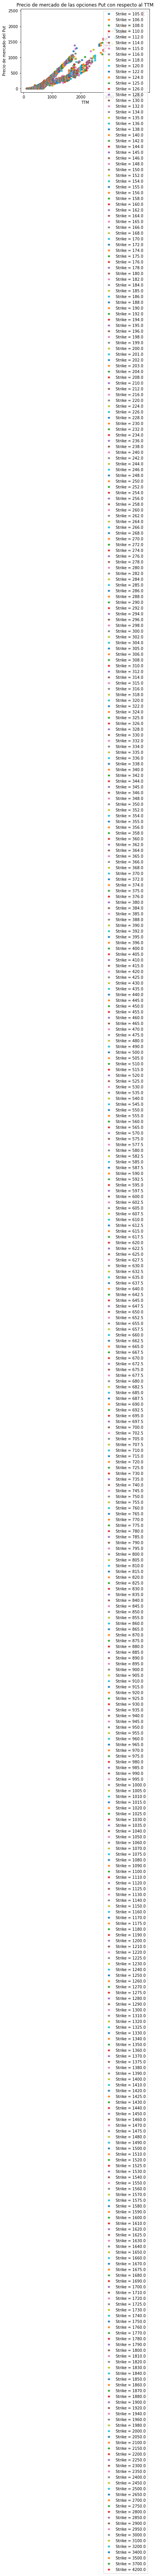

In [34]:
from matplotlib import pyplot as plt
CP = "P"
for K in Ks[100:]:
    TTMs = panel_opciones_nyse_limpio[(panel_opciones_nyse_limpio.Strike == K) & (panel_opciones_nyse_limpio.CallPut == CP)].Strike.values
    precios = panel_opciones_nyse_limpio[(panel_opciones_nyse_limpio.Strike == K) & (panel_opciones_nyse_limpio.CallPut == CP)].Last.values
    if len(TTMs)>1:
        plt.plot(TTMs, precios,'*', label='Strike = '+str(K))

plt.legend()

plt.xlabel('TTM')
plt.ylabel('Precio de mercado del Put')
plt.title('Precio de mercado de las opciones Put con respecto al TTM')
    
plt.show()

## Pasar a Excel

In [35]:
panel_opciones_ggal_nyse_crudo = obtener_panel_opciones_nyse('GGAL', False)
panel_opciones_ggal_nyse_crudo.to_excel('Clase_2_panel_opciones_ggal_nyse_crudo.xls')

panel_opciones_ggal_nyse_limpio = obtener_panel_opciones_nyse('GGAL', True)
panel_opciones_ggal_nyse_limpio.to_excel('Clase_2_panel_opciones_ggal_nyse_limpio.xls')


panel_opciones_aapl_nyse_limpio = obtener_panel_opciones_nyse('AAPL', True)
panel_opciones_aapl_nyse_limpio.to_excel('Clase_2_panel_opciones_aapl_nyse_limpio.xls')                                                
         

<ipython-input-35-22d6e1261356>:2: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  panel_opciones_ggal_nyse_crudo.to_excel('Clase_2_panel_opciones_ggal_nyse_crudo.xls')
<ipython-input-35-22d6e1261356>:5: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be

## 3) Payoffs y Estrategias

In [39]:
import numpy as np
from matplotlib import pyplot as plt


### Vanilla Call y Put

In [40]:
def payoff_call(S,K):
    return np.maximum(S-K,0)

def payoff_put(S,K):
    return np.maximum(K-S,0)


In [41]:
K=50
S = np.linspace(0,100,50)


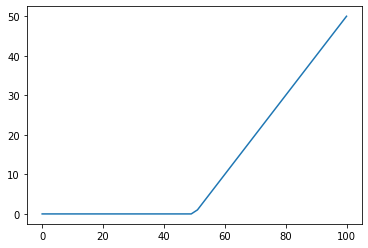

In [42]:
#Grafico la call

plt.plot(S,payoff_call(S, K))
plt.show()


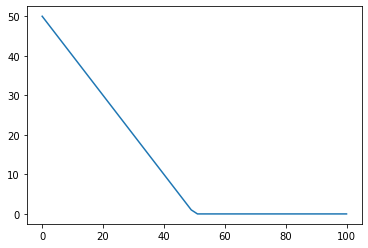

In [43]:
#Grafico la put
plt.plot(S,payoff_put(S, K))
plt.show()

### Forward sintetico y Combo

In [44]:
def payoff_forwardSintetico(S,K):
    return payoff_call(S,K)-payoff_put(S, K)

def payoff_combo(S,K1,K2):
    return payoff_call(S,K2)-payoff_put(S, K1)


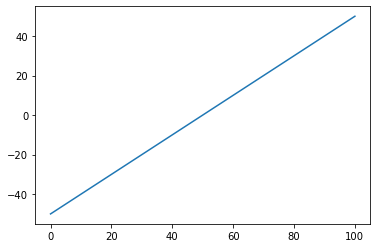

In [45]:
#Grafico el forward sintetico
plt.plot(S,payoff_forwardSintetico(S, K))
plt.show()



In [46]:
K1 = 35
K2 = 65

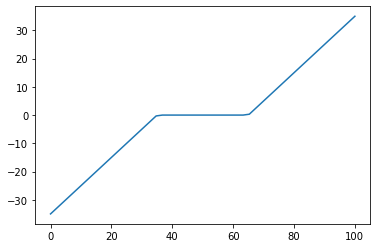

In [47]:
#Grafico el combo
plt.plot(S,payoff_combo(S, K1,K2))
plt.show()

### Spreads

In [48]:
def payoff_BullCS(S,K1,K2):
    return payoff_call(S,K1)-payoff_call(S, K2)

def payoff_BearCS(S,K1,K2):
    return payoff_call(S,K2)-payoff_call(S, K1)

def payoff_BullPS(S,K1,K2):
    return payoff_put(S,K1)-payoff_put(S, K2)


def payoff_BearPS(S,K1,K2):
    return payoff_put(S,K2)-payoff_put(S, K1)


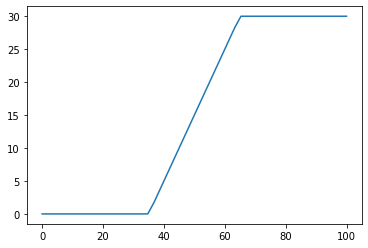

In [49]:
#Grafico el Bull Call Spread
plt.plot(S,payoff_BullCS(S, K1, K2))
plt.show()


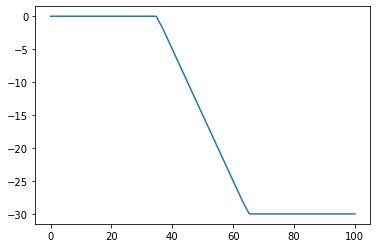

In [50]:
#Grafico el Bear Call Spread
plt.plot(S,payoff_BearCS(S, K1, K2))
plt.show()


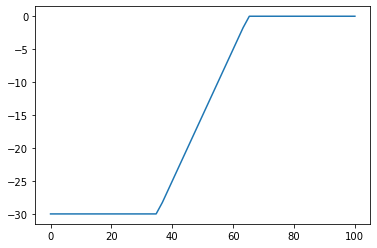

In [51]:
#Grafico el Bull Put Spread
plt.plot(S,payoff_BullPS(S, K1, K2))
plt.show()



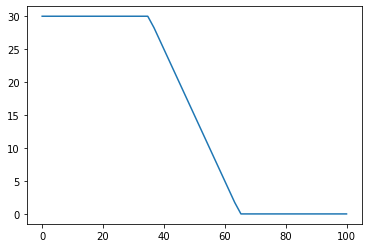

In [52]:
#Grafico el Bear Put Spread
plt.plot(S,payoff_BearPS(S, K1, K2))
plt.show()



### Butterfly spreads

In [53]:
def payoff_CButterflyS(S,K1,K2,K3):
    return payoff_call(S,K1)-2*payoff_call(S, K2)+payoff_call(S, K3)

def payoff_PButterflyS(S,K1,K2,K3):
    return payoff_put(S,K1)-2*payoff_put(S, K2)+payoff_put(S, K3)



In [54]:
K1=35
K2=50
K3=65


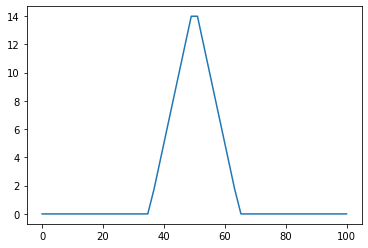

In [55]:
#Grafico el Call Buterfly Spread
plt.plot(S,payoff_CButterflyS(S, K1, K2,K3))
plt.show()




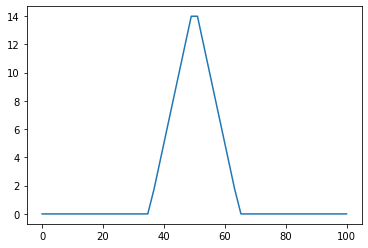

In [56]:
#Grafico el Put Buterfly Spread
plt.plot(S,payoff_PButterflyS(S, K1, K2,K3))
plt.show()


### Straddle y Strangle

In [57]:
def payoff_straddle(S,K):
    return payoff_call(S,K)+payoff_put(S, K)


def payoff_strangle(S,K1,K2):
    return payoff_call(S,K1)+payoff_put(S, K2)





In [58]:

K1 = 35
K2 = 65


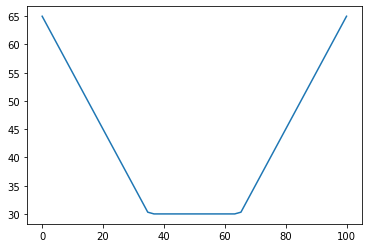

In [59]:
#Grafico el Strangle
plt.plot(S,payoff_strangle(S, K1,K2))
plt.show()


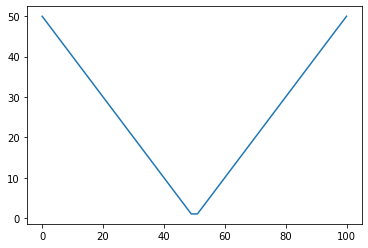

In [60]:
#Grafico el Straddle

plt.plot(S,payoff_straddle(S, K))
plt.show()


### Estrategia AD hoc - Iron Condor

In [61]:
def payoff_iron_condor(S,K1,K2,K3,K4):
    return payoff_put(S,K1)-payoff_put(S, K2)-payoff_call(S,K3)+payoff_call(S,K4)

In [62]:
K1 = 30
K2 = 45
K3 = 55
K4 = 70

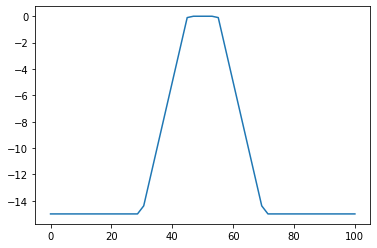

In [63]:
plt.plot(S,payoff_iron_condor(S, K1,K2,K3,K4))
plt.show()


In [66]:
#usando el script con los metodos
import payoffs
payoffs.payoff_call(100,50)

50